In [1]:
import lib.db_connector
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
db = lib.db_connector.DbConnector(db_name = 'speakql_study', verbose = False)

Initializing DbConnector class for a mysql  connection to speakql_study
Attempting to connect to speakql_study
DBCONNECTOR: Connected to 8.0.31-0ubuntu0.22.04.1


In [2]:
query = open("./queries/get_all_correct_queries.sql").read()
correct_answers = db.do_single_select_query_into_dataframe(query)
correct_answers = correct_answers.where(correct_answers.ispractice == 0).dropna(how = 'all')
print(correct_answers.columns)
correct_answers

Index(['idparticipant', 'idsession', 'idattemptsubmission', 'idquery',
       'tt_speakql', 'rt_speakql', 'pt_speakql', 'fpt_speakql', 'tpt_speakql',
       'tt_all_speakql', 'step_speakql', 'attemptnum_speakql',
       'correct_speakql', 'tt_sql', 'rt_sql', 'pt_sql', 'fpt_sql', 'tpt_sql',
       'tt_all_sql', 'step_sql', 'attemptnum_sql', 'correct_sql', 'idsequence',
       'speakql_first', 'ispractice', 'complexity', 'normalized', 'is_complex',
       'num_mods', 'num_joins', 'num_funcs', 'num_proj', 'num_tables',
       'num_selections', 'participant_experience', 'participant_self_rating'],
      dtype='object')


,idparticipant,idsession,idattemptsubmission,idquery,tt_speakql,rt_speakql,pt_speakql,fpt_speakql,tpt_speakql,tt_all_speakql,...,normalized,is_complex,num_mods,num_joins,num_funcs,num_proj,num_tables,num_selections,participant_experience,participant_self_rating
20,20.0,63.0,1137.0,2.0,9.0,8.0,1.0,19.0,20,39,...,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0,None,NaN
21,18.0,61.0,1035.0,2.0,94.0,13.0,80.0,80.0,80,94,...,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0,None,NaN
22,19.0,62.0,1074.0,2.0,36.0,6.0,29.0,29.0,29,36,...,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0,None,NaN
23,2.0,41.0,302.0,2.0,50.0,6.0,44.0,44.0,44,50,...,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Graduate student,4.0
24,4.0,45.0,418.0,2.0,22.0,11.0,11.0,11.0,11,22,...,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Graduate student,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,3.0,44.0,370.0,17.0,208.0,94.0,114.0,114.0,114,208,...,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0,Graduate student,5.0
278,5.0,46.0,459.0,17.0,334.0,59.0,275.0,275.0,275,334,...,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0,Graduate student,4.0
279,7.0,48.0,520.0,17.0,267.0,130.0,137.0,137.0,137,267,...,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0,Graduate student,2.0
280,13.0,54.0,825.0,17.0,250.0,61.0,189.0,252.0,480,654,...,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0,Senior professional,5.0


**One-way ANOVA of total time (planning time + recording time): speakql ~ sql**

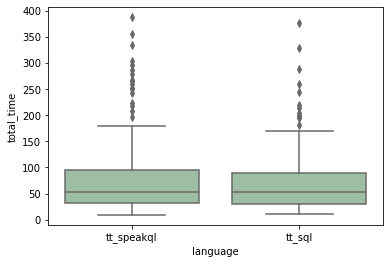

,sum_sq,df,F,PR(>F)
C(language),6.814215e+03,1.0,1.699602,0.193007
Residual,1.804186e+06,450.0,NaN,NaN


In [3]:
df_melt = pd.melt(
    correct_answers.reset_index(), 
    id_vars=['index'], 
    value_vars=['tt_speakql', 'tt_sql']
)
df_melt.columns = ['index', 'language', 'total_time']
df_melt['total_time'] = df_melt.total_time.astype('int64')

ax = sns.boxplot(x='language', y='total_time', data=df_melt, color='#99c2a2')
plt.show()

model = ols('total_time ~ C(language)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

**One-way ANOVA of total planning time: speakql ~ sql**

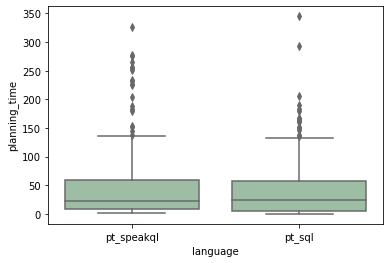

,sum_sq,df,F,PR(>F)
C(language),4.311540e+03,1.0,1.306806,0.253581
Residual,1.484683e+06,450.0,NaN,NaN


In [4]:
df_melt = pd.melt(
    correct_answers.reset_index(), 
    id_vars=['index'], 
    value_vars=['pt_speakql', 'pt_sql']
)
df_melt.columns = ['index', 'language', 'planning_time']
df_melt['planning_time'] = df_melt.planning_time.astype('int64')
ax = sns.boxplot(x='language', y='planning_time', data=df_melt, color='#99c2a2')
plt.show()
model = ols('planning_time ~ C(language)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

**MLR**

In [5]:
from sklearn import linear_model
import numpy as np
db = lib.db_connector.DbConnector(db_name = 'speakql_study', verbose = False)
query = open("./queries/get_all_final_attempts.sql").read()
final_attempts = db.do_single_select_query_into_dataframe(query)
final_attempts = final_attempts.where(final_attempts.tot_pt < 500).dropna(how = 'all')
final_attempts = final_attempts.where(final_attempts.ispractice == 0).dropna(how = 'all')
print(final_attempts.columns)
final_attempts

Initializing DbConnector class for a mysql  connection to speakql_study
Attempting to connect to speakql_study
DBCONNECTOR: Connected to 8.0.31-0ubuntu0.22.04.1
Index(['idparticipant', 'idsession', 'idattemptsubmission', 'idquery',
       'idstep', 'attemptnum', 'total_time', 'recording_time', 'planning_time',
       'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step', 'speakql_first',
       'language', 'ispractice', 'correct', 'usedspeakql', 'complexity',
       'normalized', 'is_complex', 'num_mods', 'num_joins', 'num_funcs',
       'num_proj', 'num_tables', 'num_selections'],
      dtype='object')


,idparticipant,idsession,idattemptsubmission,idquery,idstep,attemptnum,total_time,recording_time,planning_time,tot_pt,...,usedspeakql,complexity,normalized,is_complex,num_mods,num_joins,num_funcs,num_proj,num_tables,num_selections
117,2.0,41.0,285.0,2.0,7.0,1.0,41.0,7.0,33.0,33,...,0.0,2.05,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
118,4.0,45.0,397.0,2.0,7.0,1.0,29.0,9.0,20.0,20,...,0.0,2.05,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
119,8.0,49.0,555.0,2.0,7.0,1.0,17.0,6.0,11.0,11,...,0.0,2.05,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
120,6.0,47.0,634.0,2.0,7.0,1.0,49.0,9.0,41.0,41,...,0.0,2.05,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
121,10.0,51.0,677.0,2.0,7.0,1.0,65.0,6.0,58.0,58,...,0.0,2.05,-0.954132,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,16.0,57.0,986.0,17.0,30.0,2.0,85.0,81.0,4.0,81,...,1.0,12.25,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0
567,5.0,46.0,474.0,17.0,30.0,2.0,46.0,38.0,8.0,104,...,0.0,12.25,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0
568,13.0,54.0,841.0,17.0,30.0,2.0,49.0,45.0,3.0,190,...,0.0,12.25,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0
569,15.0,56.0,932.0,17.0,30.0,2.0,76.0,64.0,11.0,327,...,0.0,12.25,2.364755,1.0,0.0,4.0,0.0,1.0,5.0,4.0


### Multi-variate linear regression analysis

**Start by creating some interactions:**

In [6]:
# Create SQL and SpeakQL interaction variables:

final_attempts['speakqlXcomplex'] = final_attempts.apply(
    lambda row: row.usedspeakql * row.is_complex,
    axis = 1
)

final_attempts['sqlXcomplex'] = final_attempts.apply(
    lambda row: -1 * (1 - row.usedspeakql) * row.is_complex,
    axis = 1
)

final_attempts['speakqlXnum_funcs'] = final_attempts.apply(
    lambda row: row.usedspeakql * row.num_funcs,
    axis = 1
)

final_attempts['sqlXnum_funcs'] = final_attempts.apply(
    lambda row: -1 * (1 - row.usedspeakql) * row.num_funcs,
    axis = 1
)

final_attempts['speakqlXnum_tables'] = final_attempts.apply(
    lambda row: row.usedspeakql * row.num_tables,
    axis = 1
)

final_attempts['sqlXnum_tables'] = final_attempts.apply(
    lambda row: -1 * (1 - row.usedspeakql) * row.num_tables, 
    axis = 1
)

final_attempts['speakqlXnum_proj'] = final_attempts.apply(
    lambda row: row.usedspeakql * row.num_proj,
    axis = 1
)

final_attempts['sqlXnum_proj'] = final_attempts.apply(
    lambda row: -1 * (1 - row.usedspeakql) * row.num_proj,
    axis = 1
)

final_attempts['speakqlXnum_selections'] = final_attempts.apply(
    lambda row: row.usedspeakql * row.num_selections,
    axis = 1
)

final_attempts['sqlXnum_selections'] = final_attempts.apply(
    lambda row: -1 * (1 - row.usedspeakql) * row.num_selections,
    axis = 1
)

**First attempt, total time (all attempts) as dependent variable, speakql and sql interactions as independent variables**

In [7]:


x = final_attempts[[ 
    'speakqlXnum_funcs', 
    'sqlXnum_funcs',
    'speakqlXnum_tables',
    'sqlXnum_tables',
    'speakqlXnum_proj',
    'sqlXnum_proj',
    'speakqlXnum_selections',
    'sqlXnum_selections'
]]

for column in x.columns:
    x[column] = x[column].astype('int64')

y = final_attempts['tot_tt'].astype('int64')
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 tot_tt   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     24.54
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.68e-31
Time:                        08:51:00   Log-Likelihood:                -2650.8
No. Observations:                 454   AIC:                             5320.
Df Residuals:                     445   BIC:                             5357.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6

<ipython-input-7-64947e679541>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype('int64')


That didn't seem very informative. P values on all but interactions with numbers of tables seem insignificant. 

**Split data sets (complex and simple queries)**

In [8]:
complex_df = final_attempts.where(final_attempts.is_complex == 1).dropna(how = 'all')
simple_df = final_attempts.where(final_attempts.is_complex == 0).dropna(how = 'all')
assert(complex_df.shape[0] + simple_df.shape[0] == final_attempts.shape[0])

**Simple queries:**

In [9]:
x = simple_df[[ 
    'speakqlXnum_funcs', 
    'sqlXnum_funcs',
    'speakqlXnum_tables',
    'sqlXnum_tables',
    'speakqlXnum_proj',
    'sqlXnum_proj',
    'speakqlXnum_selections',
    'sqlXnum_selections'
]]

print('Y = total time all attempts')

for column in x.columns:
    x[column] = x[column].astype('int64')

y = simple_df['tot_tt'].astype('int64')
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

print('Y = number of attempts')
y = simple_df['attemptnum'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

Y = total time all attempts
                            OLS Regression Results                            
Dep. Variable:                 tot_tt   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.53e-14
Time:                        08:51:47   Log-Likelihood:                -1056.3
No. Observations:                 200   AIC:                             2129.
Df Residuals:                     192   BIC:                             2155.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


<ipython-input-9-2dcb7f319711>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype('int64')


**Complex Queries:**

In [137]:
x = complex_df[[
    'speakqlXnum_funcs', 
    'sqlXnum_funcs',
    'speakqlXnum_tables',
    'sqlXnum_tables',
    'speakqlXnum_proj',
    'sqlXnum_proj'
]]

for column in x.columns:
    x[column] = x[column].astype('int64')

print('Y = total time, all attempts')
y = complex_df['tot_tt'].astype('int64')
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

print('Y = number of attempts')
y = complex_df['attemptnum'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

Y = total time, all attempts
                            OLS Regression Results                            
Dep. Variable:                 tot_tt   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     10.80
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.74e-10
Time:                        16:00:59   Log-Likelihood:                -1391.4
No. Observations:                 220   AIC:                             2797.
Df Residuals:                     213   BIC:                             2821.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const  

<ipython-input-137-ef398805c516>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype('int64')


**MLR without interaction variables**

In [153]:
x = final_attempts[[ 
    'usedspeakql'
]]

for column in x.columns:
    x[column] = x[column].astype('int64')

y = final_attempts['tot_tt'].astype('int64')
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

y = final_attempts['planning_time'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

y = final_attempts['tot_pt'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

y = final_attempts['first_pt'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)


y = final_attempts['attemptnum'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 tot_tt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.337
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.248
Time:                        16:14:56   Log-Likelihood:                -2056.2
No. Observations:                 342   AIC:                             4116.
Df Residuals:                     340   BIC:                             4124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         116.3450      7.578     15.352      

<ipython-input-153-2dea79c0719a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype('int64')


In [161]:
x = complex_df[[ 
    'usedspeakql'
]]

for column in x.columns:
    x[column] = x[column].astype('int64')

x = sm.add_constant(x)

y = complex_df['tot_tt'].astype('int64')
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 tot_tt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8862
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.348
Time:                        16:21:16   Log-Likelihood:                -1165.0
No. Observations:                 192   AIC:                             2334.
Df Residuals:                     190   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         155.7188     10.720     14.526      

<ipython-input-161-aaf6fec8e631>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype('int64')
